In [53]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt

class LawnmowerEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        # Define the observation and action spaces
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        
        # Initialize the grid
        self.grid = np.array([[-6, -5, -6, -5],
                              [ 5, -6,  5, -6],
                              [-5,  6, -5,  6],
                              [ 6, -5,  6, -5]])
        
        # Initialize the agent and goal positions
        self.agent_pos = np.array([0, 0])
        self.goal_pos = np.array([3, 3])
        
        # Initialize the reward
        self.reward = 0
        
    def reset(self):
        # Reset the agent position and reward
        self.agent_pos = np.array([0, 0])
        self.reward = 0
        
        # Return the initial observation
        return self._get_observation()
    
    def step(self, action):
        # Move the agent based on the chosen action
        if action == 0:
            self.agent_pos[0] -= 1 # Up
        elif action == 1:
            self.agent_pos[0] += 1 # Down
        elif action == 2:
            self.agent_pos[1] += 1 # Right
        elif action == 3:
            self.agent_pos[1] -= 1 # Left
            
        # Keep the agent within the grid boundaries
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        
        # Calculate the reward based on the new agent position
        self.reward = self.grid[tuple(self.agent_pos)]
        
        # Check if the episode is done
        done = bool(self.reward > 0 or np.array_equal(self.agent_pos, self.goal_pos))
        
        # Return the new observation, reward, done flag, and info dictionary
        return self._get_observation(), self.reward, done, {}
    
    def render(self, mode='human'):
        # Create a new figure
        fig, ax = plt.subplots()
        """ 
        This code creates a scatter plot of the gridworld using the scatter method of matplotlib.axes.Axes object. 
        The plot is created for each position in the gridworld, with red markers for negative values, 
        blue markers for zero values, and green markers for positive values. 
        The agent's current position is marked with a yellow square, 
        while the goal position is marked with a magenta square.

        To use this method, you can simply call env.plot() where env is an instance of LawnmowerEnv.
        """
        # Plot the grid with markers for different tile types
        for i in range(4):
            for j in range(4):
                if self.grid[i][j] < 0:
                    ax.scatter(j, i, marker='X', color='r', s=1000)
                elif self.grid[i][j] == 0:
                    ax.scatter(j, i, marker='o', color='b', s=1000)
                elif self.grid[i][j] > 0:
                    ax.scatter(j, i, marker='o', color='g', s=1000)
        
        # Plot the agent and goal positions
        ax.scatter(self.agent_pos[1], 3 - self.agent_pos[0], marker='s', color='y', s=1000)
        ax.scatter(self.goal_pos[1], 3 - self.goal_pos[0], marker='s', color='m', s=1000)
        
        # Set the x and y axis limits
        ax.set_xlim([-0.5, 3.5])
        ax.set_ylim([-0.5, 3.5])
        
        # Show the plot
        plt.show()

        
    def _get_observation(self):
        # Convert the agent position to an observation index
        return np.ravel_multi_index(tuple(self.agent_pos), (4,4))


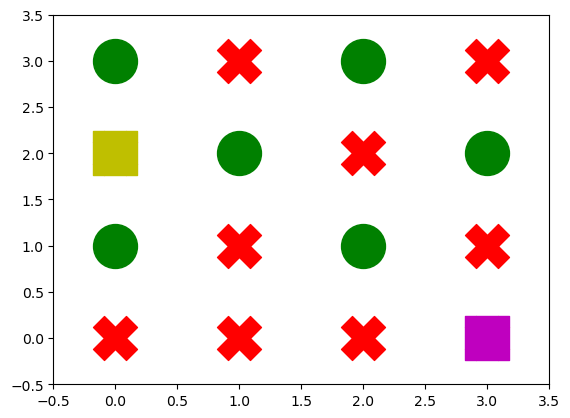

Action: 1
Reward: 5
Done: True


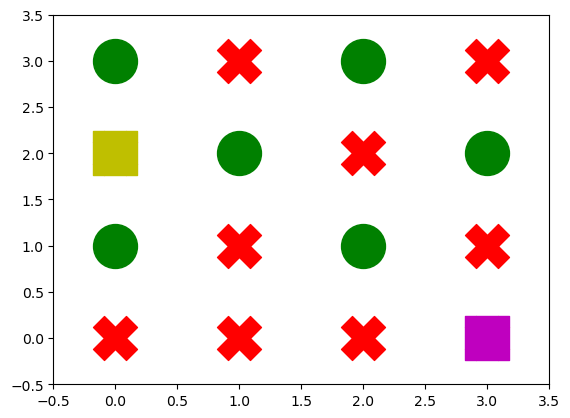

Action: 3
Reward: 5
Done: True


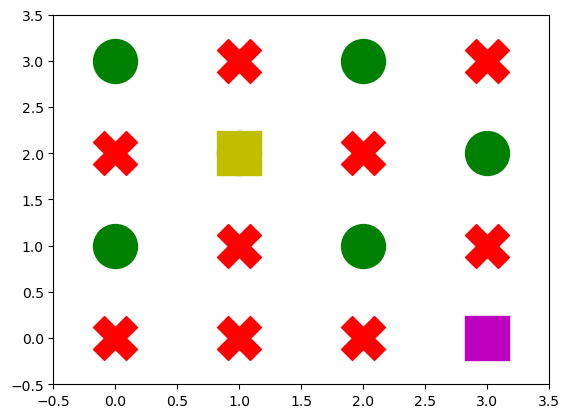

Action: 2
Reward: -6
Done: False


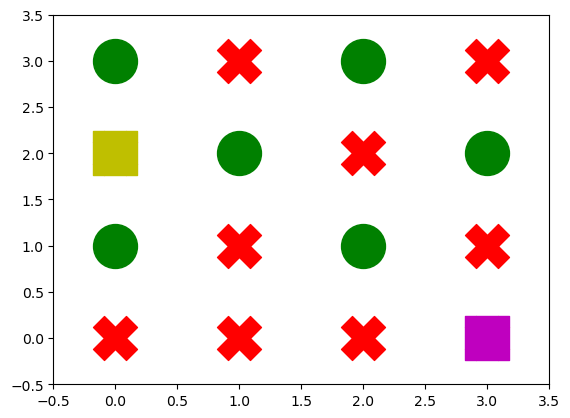

Action: 3
Reward: 5
Done: True


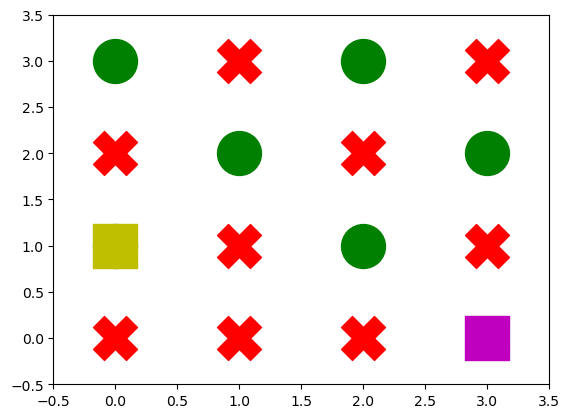

Action: 1
Reward: -5
Done: False


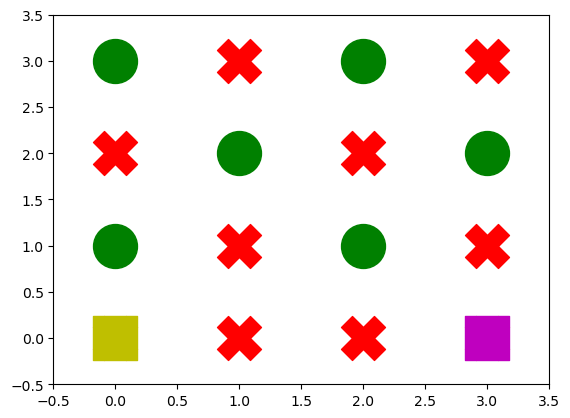

Action: 1
Reward: 6
Done: True


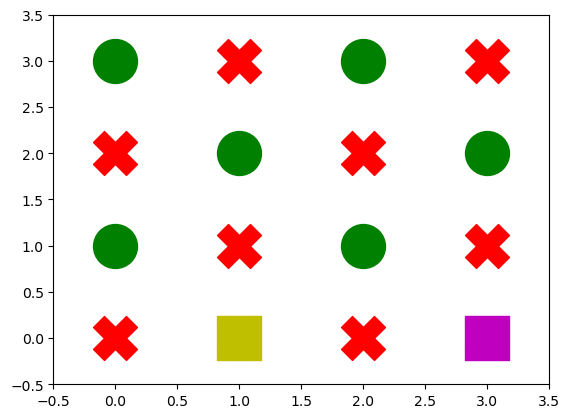

Action: 2
Reward: -5
Done: False


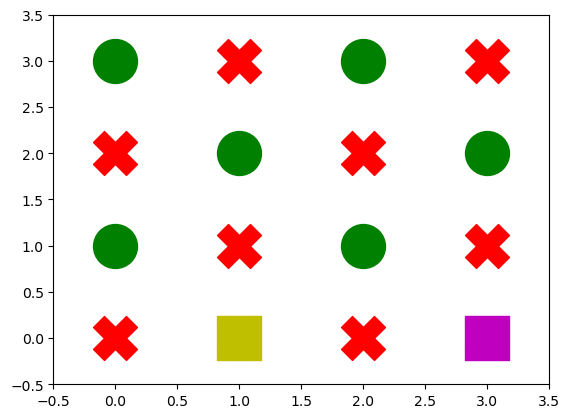

Action: 1
Reward: -5
Done: False


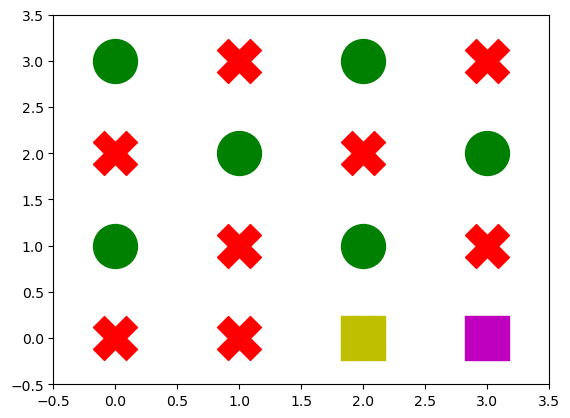

Action: 2
Reward: 6
Done: True


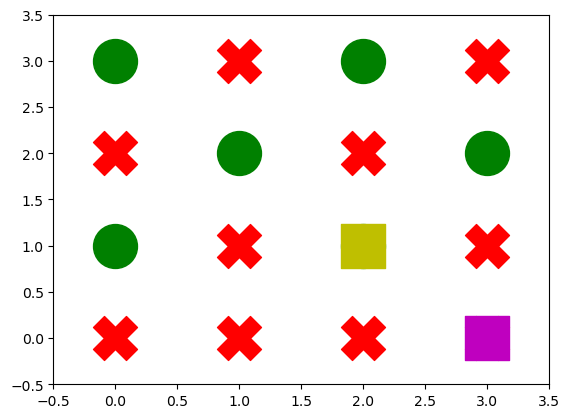

Action: 0
Reward: -5
Done: False


In [55]:
env = LawnmowerEnv()
obs = env.reset()

for t in range(10):
    action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)
    env.render()
    print('Action:', action)
    print('Reward:', reward)
    print('Done:', done)
